In [2]:
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# check the versions of key python libraries
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.9.1
numpy: 1.21.6
matplotlib: 3.5.2
pandas: 1.4.2
statsmodels: 0.13.2
sklearn: 1.0.2


## What is Time Series Forecasting?

A time series is a sequence of observations taken sequentially in time.

The current time is defined as t, an observation at the current time is defined as obs(t).
We are often interested in the observations made at prior times, called lag times or lags. Times in the past are negative relative to the current time. For example the previous time is t-1 and the time before that is t-2. The observations at these times are obs(t-1) and obs(t-2) respectively. Times in the future are what we are interested in forecasting and are positive relative to the current time. For example the next time is t+1 and the time after that is t+2. The observations at these times are obs(t+1) and obs(t+2) respectively.
For simplicity, we often drop the obs(t) notation and use t+1 instead and assume we are talking about observations at times rather than the time indexes themselves. Additionally, we can refer to an observation at a lag by shorthand such as a lag of 10 or lag=10 which would be the same as t-10. To summarize:
- t-n: A prior or lag time (e.g. t-1 for the previous time).
- t: A current time and point of reference.
- t+n: A future or forecast time (e.g. t+1 for the next time).

Making predictions about the future is called extrapolation in the classical statistical handling of time series data.

## Components of Time Series
Time series analysis provides a body of techniques to better understand a dataset. Perhaps the most useful of these is the decomposition of a time series into 4 constituent parts:
- Level. The baseline value for the series if it were a straight line.
- Trend. The optional and often linear increasing or decreasing behavior of the series over
time.
- Seasonality. The optional repeating patterns or cycles of behavior over time.
- Noise. The optional variability in the observations that cannot be explained by the model.

## Concerns of Forecasting
When forecasting, it is important to understand your goal. Use the Socratic method and ask lots of questions to help zoom in on the specifics of your predictive modeling problem. For example:
1. **How much data do you have available and are you able to gather it all together?** More data is often more helpful, offering greater opportunity for exploratory data analysis, model testing and tuning, and model fidelity.

2. **What is the time horizon of predictions that is required?**

    - Short
    - medium
    - long term

Shorter time horizons are often easier to predict with higher confidence.

3. **Can forecasts be updated frequently over time or must they be made once and remain static?** Updating forecasts as new information becomes available often results in more accurate predictions.

4. **At what temporal frequency are forecasts required?** Often forecasts can be made at a lower or higher frequencies, allowing you to harness down-sampling, and up-sampling of data, which in turn can offer benefits while modeling.

Time series data often requires cleaning, scaling, and even transformation. For example:

- **Frequency.** Perhaps data is provided at a frequency that is too high to model or is unevenly spaced through time requiring resampling for use in some models.
- **Outliers.** Perhaps there are corrupt or extreme outlier values that need to be identified and handled.
- **Missing.** Perhaps there are gaps or missing data that need to be interpolated or imputed.


# Supervised learning vs Regression

- Classification: A classification problem is when the output variable is a category, such as red and blue or disease and no disease.
- Regression: A regression problem is when the output variable is a real value, such as dollars or weight. The contrived example above is a regression problem.


##  Sliding Window With Multivariates
The number of observations recorded for a given time in a time series dataset matters. Tradi- tionally, different names are used:
-  **Univariate Time Series:** These are datasets where only a single variable is observed at each time, such as temperature each hour. The example in the previous section is a univariate time series dataset.
-  **Multivariate Time Series:** These are datasets where two or more variables are observed at each time.


## Sliding Window With Multiple Steps
The number of time steps ahead to be forecasted is important. Again, it is traditional to use different names for the problem depending on the number of time-steps to forecast:
- **One-step Forecast:** This is where the next time step (t+1) is predicted.
- **Multi-step Forecast:** This is where two or more future time steps are to be predicted.

# Data Preparation
## Load Time Series Data
Pandas represented time series datasets as a Series. A Series1 is a one-dimensional array with a time label for each row. The main function for loading CSV data in Pandas is the read csv() function2. We can use this to load the time series as a Series object, instead of a DataFrame, as follows:


In [4]:
# load dataset using read_csv()
from pandas import read_csv
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


In [5]:
series

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

In [6]:
# Number of Observation
print(series.size)

365


In [7]:
# Querying By Time
series['1959-01']

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64

In [8]:
# Descriptive Statistics
print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


# Graph our data

<AxesSubplot:xlabel='Date'>

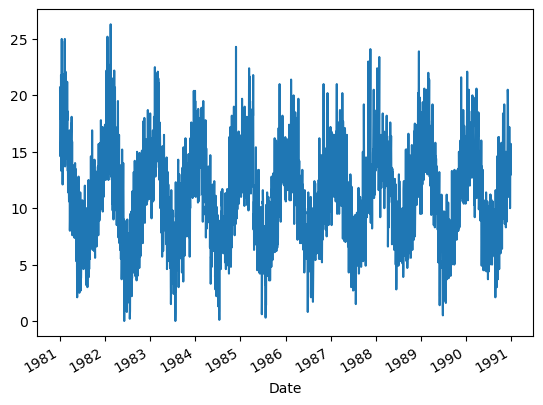

In [9]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()

pyplot.show()

## Feature Engineering

- Date Time Features: these are components of the time step itself for each observation.
- Lag Features: these are values at prior time steps.
- Window Features: these are a summary of values over a fixed window of prior time steps.


In [10]:
# create date time features of a dataset
from pandas import read_csv
from pandas import DataFrame
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head(5))

dataframe = DataFrame()

dataframe['month'] = [series.index[i].month for i in range(len(series))] 
dataframe['day'] = [series.index[i].day for i in range(len(series))] 
dataframe['temperature'] = [series[i] for i in range(len(series))] 
print(dataframe.head(5))

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64
   month  day  temperature
0      1    1         20.7
1      1    2         17.9
2      1    3         18.8
3      1    4         14.6
4      1    5         15.8


You may enumerate all the properties of a time-stamp and consider what might be useful for your problem, such as:
-  Minutes elapsed for the day. 
- Hour of day.
- Business hours or not.
- Weekend or not.
- Season of the year.
- Business quarter of the year. 􏰀 Daylight savings or not.
- Public holiday or not.
- Leap year or not.


## Lag Features
Lag features are the classical way that time series forecasting problems are transformed into supervised learning problems.

The Pandas library provides the shift() function1 to help create these shifted or lag features from a time series dataset. Shifting the dataset by 1 creates the t column, adding a NaN
(unknown) value for the first row. The time series dataset without a shift represents the t+1. Let’s make this concrete with an example.

In [11]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
dataframe = concat([temps.shift(-3) ,temps.shift(-1) , temps , temps.shift(1) , temps.shift(3 )], axis=1) 
dataframe.columns = ['t-3' ,'t-1', 't', 't+1' , 't+3'] 
print(dataframe.head(10))

    t-3   t-1     t   t+1   t+3
0  14.6  17.9  20.7   NaN   NaN
1  15.8  18.8  17.9  20.7   NaN
2  15.8  14.6  18.8  17.9   NaN
3  15.8  15.8  14.6  18.8  20.7
4  17.4  15.8  15.8  14.6  17.9
5  21.8  15.8  15.8  15.8  18.8
6  20.0  17.4  15.8  15.8  14.6
7  16.2  21.8  17.4  15.8  15.8
8  13.3  20.0  21.8  17.4  15.8
9  16.7  16.2  20.0  21.8  15.8


A difficulty with the sliding window approach is how large to make the window for your problem. Perhaps a good starting point is to perform a sensitivity analysis and try a suite of different window widths to in turn create a suite of different views of your dataset and see which results in better performing models. There will be a point of diminishing returns.


Additionally, why stop with a linear window? Perhaps you need a lag value from last week, last month, and last year. Again, this comes down to the specific domain. In the case of the temperature dataset, a lag value from the same day in the previous year or previous few years may be useful. We can do more with a window than include the raw values. 

## Rolling Window Statistics
A step beyond adding raw lagged values is to add a summary of the values at previous time steps. We can calculate summary statistics across the values in the sliding window and include these as features in our dataset. Perhaps the most useful is the mean of the previous few values, also called the rolling mean.

First, the series must be shifted. Then the rolling dataset can be created and the mean values calculated on each window of two values. 

In [14]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1) 
dataframe.columns = ['mean(t-1,t)', 't+1'] 
print(dataframe.head(5))


   mean(t-1,t)   t+1
0          NaN  20.7
1          NaN  17.9
2        19.30  18.8
3        18.35  14.6
4        16.70  15.8


In [15]:
np.mean([20.7 , 17.9]) , np.mean([ 17.9 , 18.8]) , np.mean([18.8 , 14.6])

(19.299999999999997, 18.35, 16.7)

- The first NaN was created by the shift of the series.
- The second because NaN cannot be used to calculate a mean value.
- Finally, the third row shows the expected value of 19.30 (the mean of 20.7 and 17.9) used to predict the 3rd value in the series of 18.8


There are more statistics we can calculate and even different mathematical ways of calculating the definition of the window. Below is another example that shows a window width of 3 and a dataset comprised of more summary statistics, specifically the minimum, mean, and maximum value in the window.

In [16]:
# create rolling statistics features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0   NaN        NaN   NaN  20.7
1   NaN        NaN   NaN  17.9
2   NaN        NaN   NaN  18.8
3   NaN        NaN   NaN  14.6
4  17.9  19.133333  20.7  15.8


In [17]:
# create expanding window features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


In [18]:
# create expanding window features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))


    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


In [19]:
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
window = series.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

                      min       mean   max  t+1
1981-01-01 00:00:00  20.7  20.700000  20.7  NaN
1981-01-02 00:00:00  17.9  19.300000  20.7  NaN
1981-01-03 00:00:00  17.9  19.133333  20.7  NaN
1981-01-04 00:00:00  14.6  18.000000  20.7  NaN
1981-01-05 00:00:00  14.6  17.560000  20.7  NaN


## Data Visualization
1. Line Plots.
2. Histograms and Density Plots.
3. Box and Whisker Plots.
4. Heat Maps.
5. Lag Plots or Scatter Plots.
6. Autocorrelation Plots.


<AxesSubplot:xlabel='Date'>

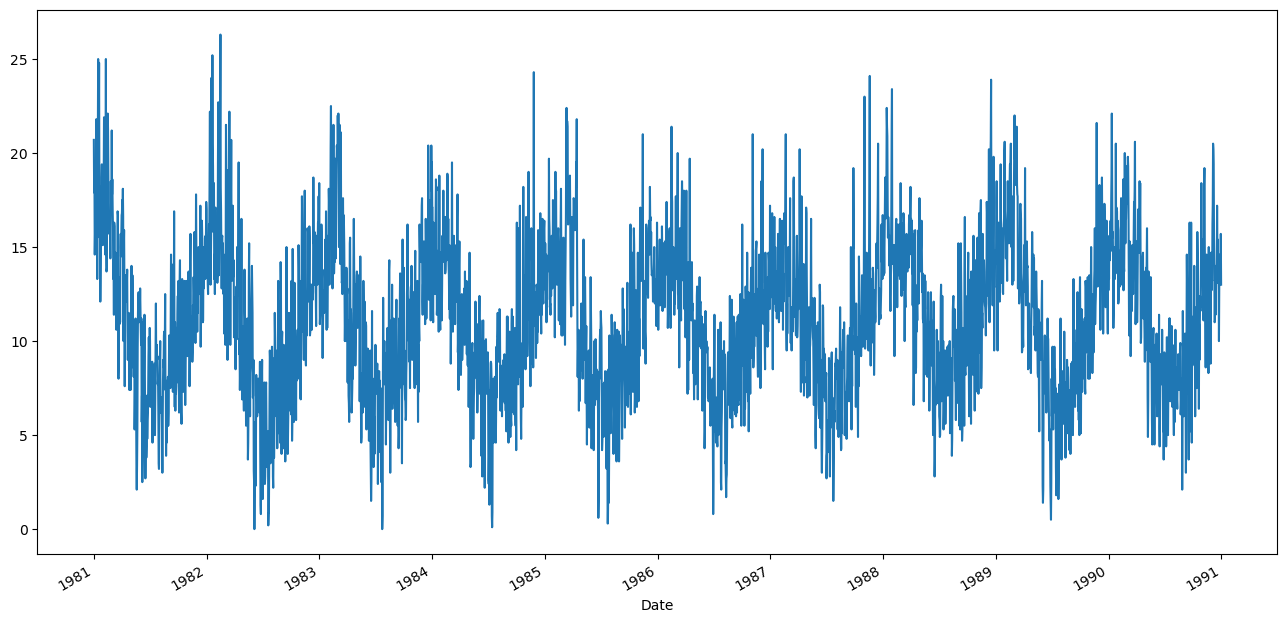

In [20]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)
series.plot()
pyplot.show()

The line plot is quite dense. Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots. Below is an example of changing the style of the line to be black dots instead of a connected line (the style=’k.’ argument). We could change this example to use a dashed line by setting style to be ’k--’.


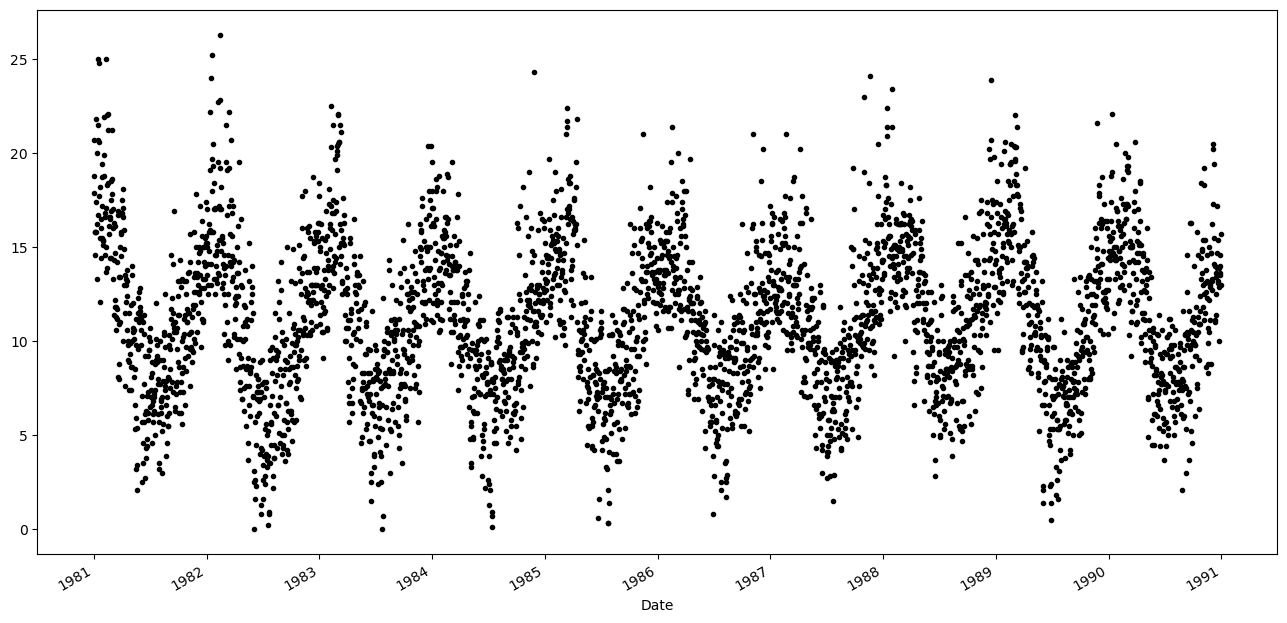

In [21]:
# create a dot plot
from pandas import read_csv
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)
series = read_csv('./data/daily-minimum-temperatures.csv', 
                  header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(style='k.')
plt.show();

It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year. The Minimum Daily Temperatures dataset spans 10 years. We can group data by year and create a line plot for each year for direct compari- son. The example below shows how to do this. First the observations are grouped by year
(series.groupby(Grouper(freq=’A’))).

The groups are then enumerated and the observations for each year are stored as columns
in a new DataFrame. Finally, a plot of this contrived DataFrame is created with each column visualized as a subplot with legends removed to cut back on the clutter.

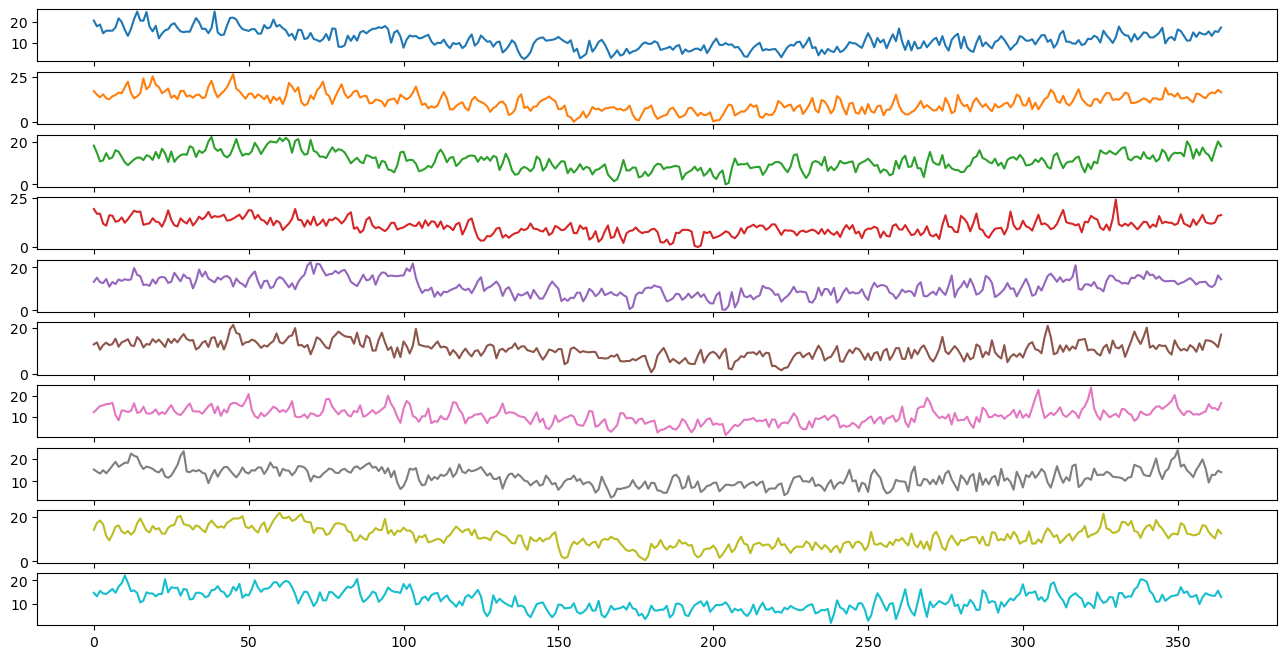

In [22]:
# create stacked line plots

from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
import matplotlib.pyplot as plt

series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
plt.rcParams["figure.figsize"] = (16,8)


for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
plt.show();


**Running the example creates 10 line plots, one for each year from 1981 at the top and 1990 at the bottom, where each line plot is 365 days in length.**

## Histogram and Density Plots
Another important visualization is of the distribution of observations themselves. This means a plot of the values without the temporal ordering. Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.

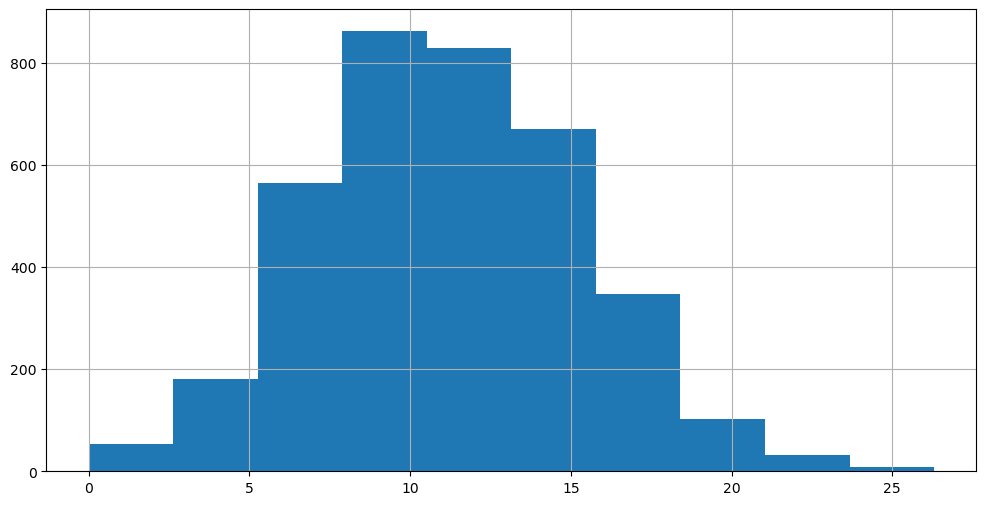

In [23]:
# create a histogram plot
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
import matplotlib.pyplot as plt

series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()

plt.rcParams["figure.figsize"] = (12,6)

series.hist()
plt.show();

We can get a better idea of the shape of the distribution of observations by using a density plot. This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution. Below is an example of a density plot of the Minimum Daily Temperatures dataset.


Running the example creates a plot that provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian. Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation techniques to reshape the distribution, like the Box-Cox transform.

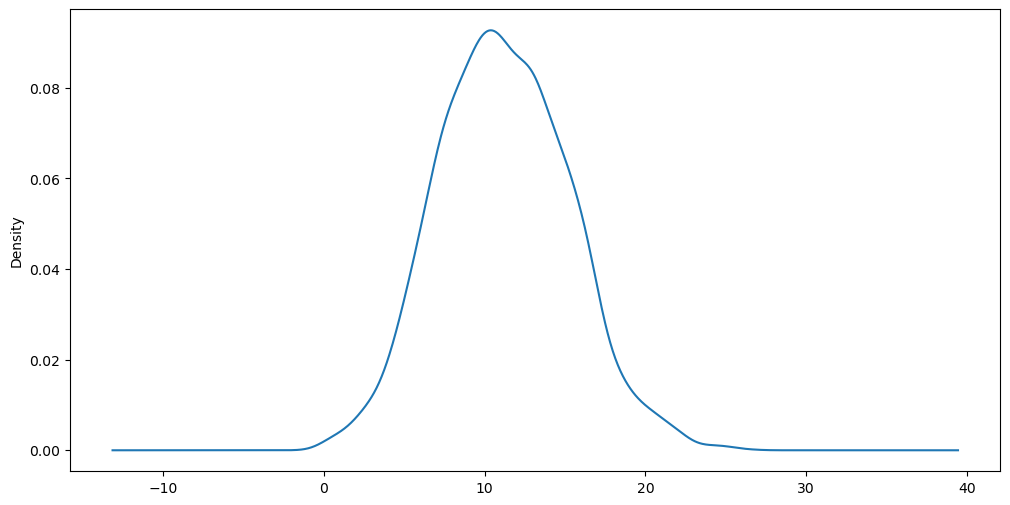

In [24]:
series.plot(kind='kde')
plt.show();

## Box and Whisker Plots by Interval
Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval. Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

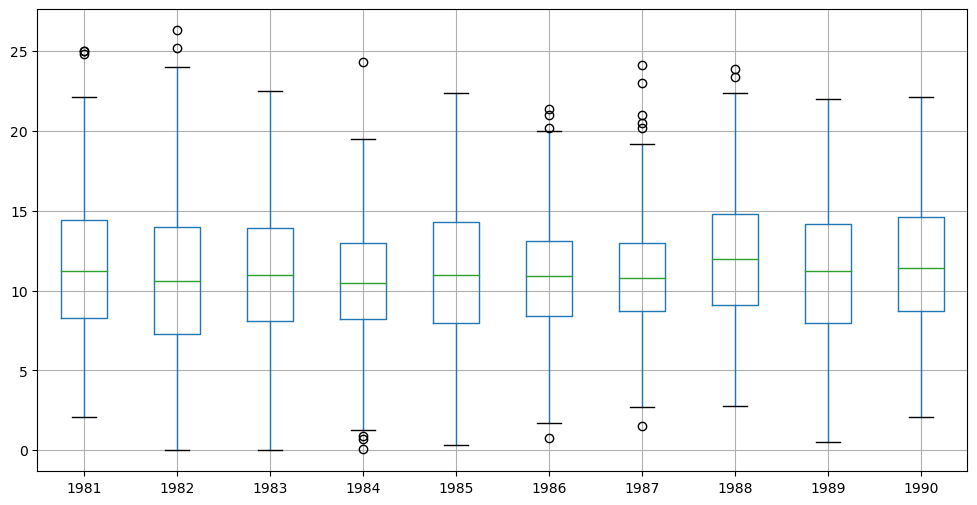

In [25]:
# create a boxplot of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
import matplotlib.pyplot as plt

series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
plt.rcParams["figure.figsize"] = (12,6)

years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show();

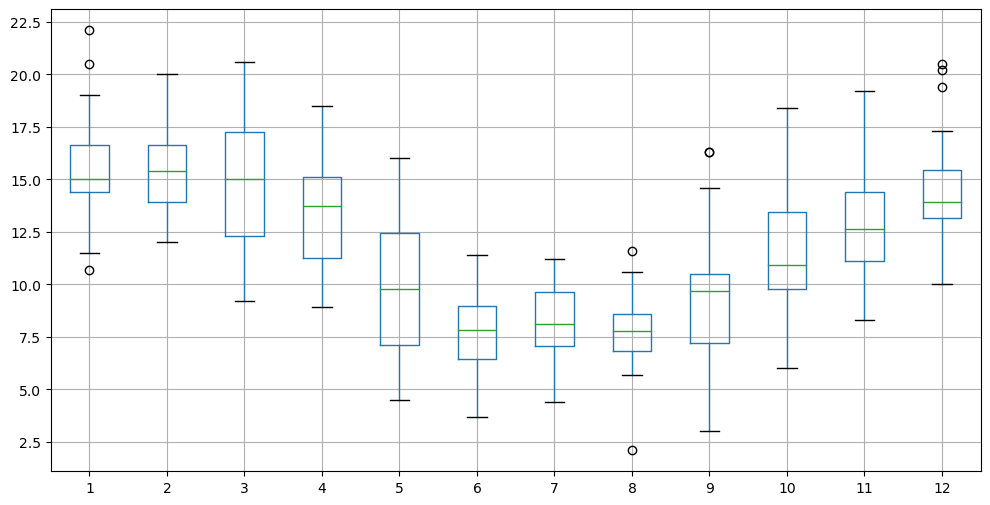

In [26]:
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1) 
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
plt.show();

## Heat Maps
A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color. This is called a heatmap, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens). Like the box and whisker plots, we can compare observations between intervals using a heat map.
In the case of the Minimum Daily Temperatures, the observations can be arranged into a matrix of year-columns and day-rows, with minimum temperature in the cell for each day. A heat map of this matrix can then be plotted. Below is an example of creating a heatmap of the Minimum Daily Temperatures data. The matshow() function from the Matplotlib library is used as no heatmap support is provided directly in Pandas.

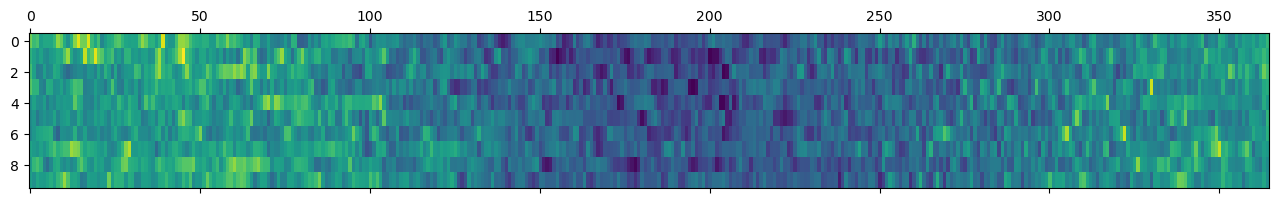

In [27]:
# create a heat map of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.show();

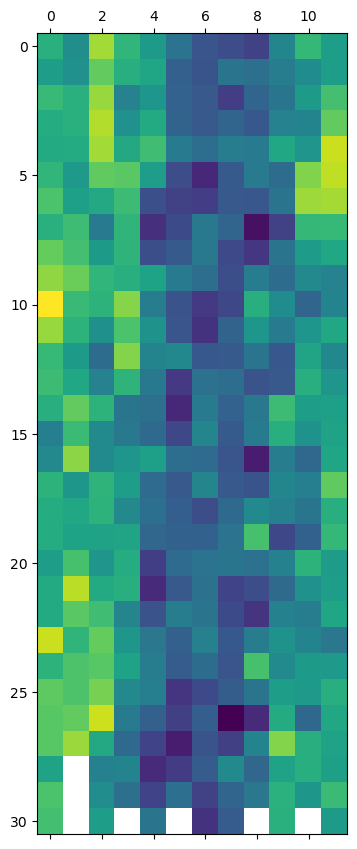

In [28]:
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation=None, aspect='auto')
plt.show();

## Lag Scatter Plots

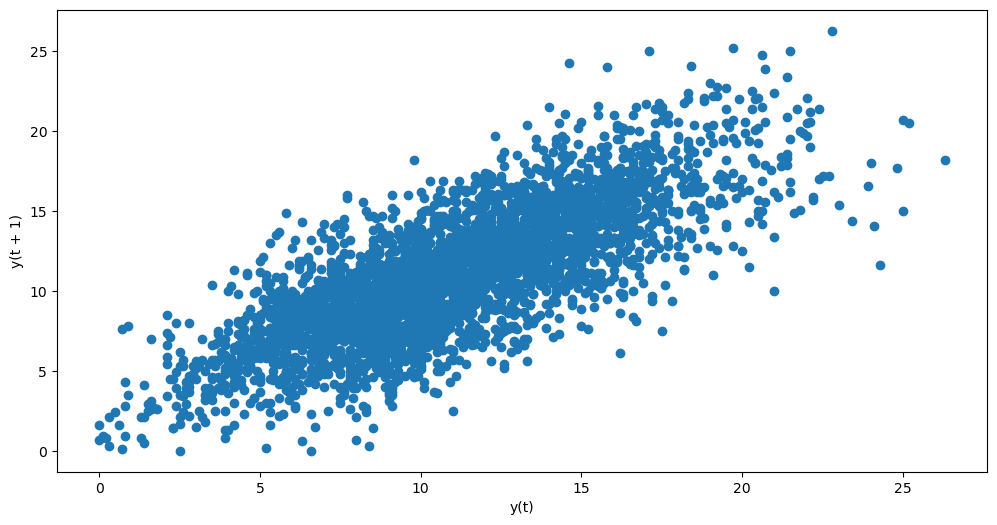

In [29]:
from pandas.plotting import lag_plot
# create a scatter plot
from pandas import read_csv
from pandas.plotting import lag_plot
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
lag_plot(series)
plt.show();

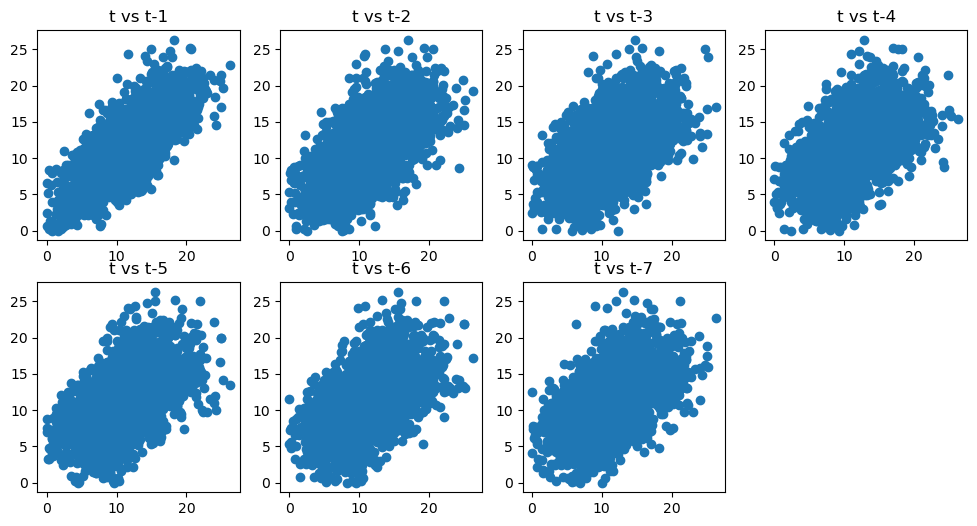

In [31]:
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t vs t-' + str(i))
	plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)

plt.show();

## Autocorrelation
We can quantify the strength and type of relationship between observations and their lags. In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation). A correlation value calculated between two groups of numbers, such as observations and their lag=1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.


Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. 
Once calculated, a plot can be created to help better understand how this relationship changes over the lag. 

This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation plot() function.

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful). 

We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen

in this example are a strong sign of seasonality in the dataset.

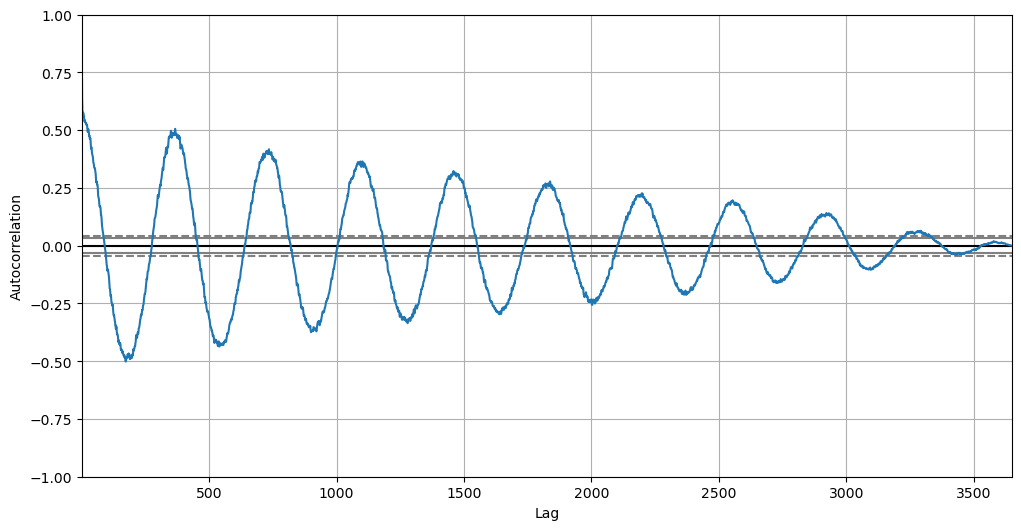

In [32]:
# create an autocorrelation plot
from pandas import read_csv
from pandas.plotting import autocorrelation_plot
series = read_csv('./data/daily-minimum-temperatures.csv', 
                  header=0, index_col=0, parse_dates=True, squeeze=True)
autocorrelation_plot(series)
plt.show();